# Exercice 1 ---- Introduction

##### 1) First Approach

In [ ]:
def count_divisors(n):
    count = 0 
    d=1
    while d<=n:
        if n%d==0:
            count+=1
        d+=1
    return count 



To obtain the divisors of n using the first solution we itterate through all elements from 1 to n in each step we test if the  element divise n the we increment our counter.

In [ ]:
%timeit count_divisors(10)
%timeit count_divisors(1000)
%timeit count_divisors(10000000)

1.47 µs ± 383 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
132 µs ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.45 s ± 362 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### 2) Second Approach

In [ ]:
def count_divisors_opt(n):
  count =0
  d =1
  while d*d <=n:
    if n%d == 0:
      count+=1 if n/d ==d else 2
    d+=1
  return count

The "Fundamental Theorem of Arithmetic" states that to determine the divisors of a number n, it is sufficient to check for values up to the square root of n. It is a fundamental concept in number theory and is often used in algorithms for finding divisors or prime factorization of a number.

In this optimal version, instead of reaching n we go just until sqrt(n), and when n/d!=d it means we get two divisors and then we gained in terms of iterations.


3) Which algorithm is faster :

In [ ]:
%timeit count_divisors_opt(10)
%timeit count_divisors_opt(1000)
%timeit count_divisors_opt(10000000)

739 ns ± 5.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
6.97 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
468 µs ± 4.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


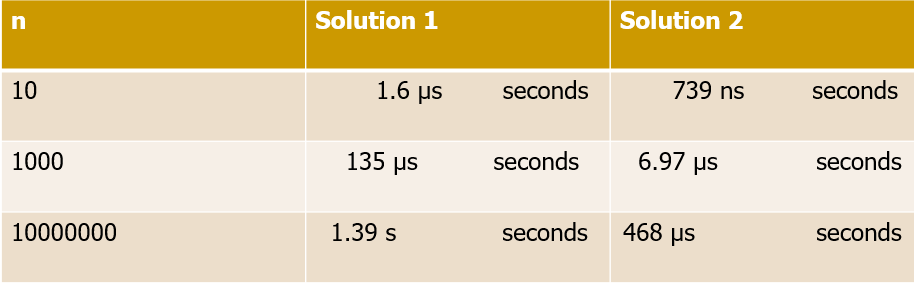

In [ ]:
from IPython import display
display.Image("/content/divisor.PNG")

##### 4) Number of operations :


> The first program execute n division, n addition and k addition where k is the number of divisors.

==> The total number of operations is 2n+k


> The second program execute sqrt(n) multiplication( d*d),sqrt(n) division(n%d) , sqrt(n) addition and k divsion + k addition where k is the number of divisors of n.

==> The total number of operations is 3 * sqrt(n) + 2*K (k number of divisors )

# Exercice 2 ---- Big-O Notation :

#### 1) Giving $T(n) = 3n^3+2n^2+ \frac{1}{2}n+7$, prove that : $T(n) = O(n^3)$

We have : $\frac{T(n)}{n^3} = \frac{3n^3+2n^2+ \frac{1}{2}n+7}{n^3}\leq3+c'   \qquad and : c'\geq \frac{2n^2+ \frac{1}{2}n+7}{n^3}$ \\

So: $T(n) \leq n^3k \qquad and: k=(3+c')$   
Then : $$T(n)\leq kf(n)$$
Thus: $T(n) = O(f(n))=O(n^3)$



2) For any $k\geq1, \quad n^k$ **is not** $O(n^{k-1})$ :

Let's take : $$T(n) = n^k \qquad and : f(n) = n^{k-1}$$
we have : $\quad \frac{T(n)}{f(n)} = \frac{n^k}{n^{k-1}} = n$
As n is not considered a constant in this case so we can't represent : $T(n)\leq Cf(n)$ We then conclude that $n^k$ is not $O(n^{k-1})$.



#Exercice 3 ---- Merge sort

In [ ]:
def merge(A,B):
  i=0
  j=0
  n=len(A)+len(B)
  C=[]
  for k in range(n):
    if i < len(A) and (j >= len(B) or A[i] <= B[j]):
      C.append(A[i])
      i+=1
    else:
      C.append(B[j])
      j+=1
  return C


#Example 
A=[1,3,6]
B=[2,5,9]
merge(A,B)

[1, 2, 3, 5, 6, 9]

The time complexity of the function is $O(n)$, where $n$ is the total number of elements in $A$ and $B$. This is because the function uses a single loop that iterates over each element in $A$ and $B$ exactly once an perfome on operation(addition)

# Exercice 4 ---- The master method

###  1) The complexity analysis of merge sort using the master theorem :
We know that time complexity of merge and sort is $T(n) = T(n/2)+T(n/2)+O(n)$
where T(n/2) is time comlexity to sort left or right list and $O(n)$ is the complexity to merge merge to sorted list .

So $T(n)= 2T(n) + O(n)$

We know that the master theorem states :
if we can write $T(n)= aT(n/b) +O(n^d)$ then 
$T(n)=\left\{\begin{array}{lll}
O\left(n^d \log n\right) & \text { if } a=b^d & \text { (Case 1) } \\
O\left(n^d\right) & \text { if } a<b^d & \text { (Case 2) } \\
O\left(n^{\log _b a}\right) & \text { if } a>b^d & \text { (Case 3) }
\end{array}\right.$

 in the merge and sort method $a=2,b=2,d=1$

 since $b^d=a$ so the complexity $T(n)=O(n\log _2 n))$


###  2) The complexity analysis of Binary search using the master theorem :
The time complexity of binary search on an array of size is 
$T(n) = T(n/2) + O(1)$
where $T(n/2)$ the complexity to search in the left o right list and $O(1)$ represents the constant amount of work required to compare the target element with the middle element of the subarray.

using the master theorem:
we have $a=1, b=2, d=0$ 

since $b^d=a=1$ so the complexity of binary search is:
 $T(n)=O(n^d\log _2 n))= O(\log _2 n))$


# Exercice 5 ----Matrix Multiplication

### Matrix multiplication algorithm :

In [ ]:
import numpy as np

In [ ]:
def Matrix_multi(A, B):
  res = np.zeros((A.shape[0], B.shape[1]))
  if A.shape[1]!=B.shape[0]:
    raise Exception("Sorry, The multiplication is not possible")
  else:
    # iterating by row of A
    for i in range(A.shape[0]):
        # iterating by column by B
        for j in range( B.shape[1]):
    
            # iterating by rows of B
            for k in range(B.shape[0]):
                res[i, j] += A[i, k] * B[k, j]
  return res

In [ ]:
M = np.random.randint(10, size = (256,512))
N = np.random.randint(10, size = (512,256))
%timeit Matrix_multi(M,N)


28.2 s ± 372 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 2) The complexity of the algorithm :

This algorithm requires, in the worst case, 
$n^{3}$ multiplications of scalars and 
$n^{3}-n^{2}$ additions for computing the product of two square n×n matrices. Its computational complexity is therefore $O(n^{3})$.

##### 3) The same matrix multiplication algorithm in C :
Check the attached file for execution and test.

##### 4) Matrix multiplication optimization:

In [ ]:
import numpy as np

def matrix_multiply_optimized(A, B, block_size):
    """
    Multiplies two matrices using optimized block by block multiplication
    
    Parameters:
    A (numpy.ndarray): First matrix
    B (numpy.ndarray): Second matrix
    block_size (int): Size of the blocks
    
    Returns:
    C (numpy.ndarray): Product of A and B
    """
    
    # Get the dimensions of A and B
    m, n = A.shape
    n2, p = B.shape
    
    # Check if the matrices can be multiplied
    if n != n2:
        print("Matrices cannot be multiplied")
        return None
    
    # Create an empty matrix to hold the product
    C = np.zeros((m, p))
    
    # Multiply the matrices block by block
    for i in range(0, m, block_size):
        for j in range(0, p, block_size):
            for k in range(0, n, block_size):
                # Multiply the block of A and B
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size], B[k:k+block_size, j:j+block_size])
    
    return C

In [ ]:
%timeit matrix_multiply_optimized(M,N, 128)

44.5 ms ± 975 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit matrix_multiply_optimized(M,N, 64)

40.6 ms ± 811 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit matrix_multiply_optimized(M,N, 32)

77.2 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit matrix_multiply_optimized(M,N, 16)

205 ms ± 49.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit matrix_multiply_optimized(M,N, 256)

58 ms ± 9.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


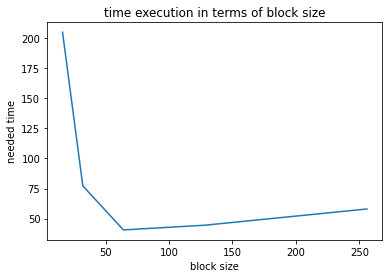

In [ ]:
import matplotlib.pyplot as plt

L=[205, 77.2, 40.6, 44.5, 58]
block=[16, 32, 64, 128, 256]
plt.plot(block, L)
plt.title("time execution in terms of block size")
plt.xlabel("block size")
plt.ylabel("needed time")

plt.show()

### Interpretation 
As observed from the time computation above, the more we increase the block size we reduce the timing needed to execute the multiplication but it may decrease at a certain size (as indicated in the plot above), that's why it's highly recommended to to search for the optimal size that returns the smallest time execution

## Bonus

In [ ]:
def merge_sort(arr1, arr2):
    # Merge two arrays into a single array
    arr = arr1 + arr2

    # Recursive case: split the array in half and merge sort each half
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half, [])
    right_half = merge_sort(right_half, [])

    # Merge the two sorted halves into a single sorted array
    result = []
    i = j = 0

    n=len(left_half)+len(right_half)
    result=[]
    for k in range(n):
      if i < len(left_half) and (j >= len(right_half) or left_half[i] <= right_half[j]):
        result.append(left_half[i])
        i+=1
      else:
        result.append(right_half[j])
        j+=1

    result += left_half[i:]
    result += right_half[j:]

    return result


#### Merge sort complexity anlysis using substution 
We know that time complexity of merge and sort is $T(n) = T(n/2)+T(n/2)+O(n)$
where T(n/2) is time comlexity to sort left or right list and $O(n)$ is the complexity to merge merge to sorted list .

So $T(n)= 2T(n) + n  (1)$ 

substitute n/2 in place of n in equation (1)
Thus, $T(n/2)= 2T(n/2) + n/2  (2)$

we replace in equation (1) we get :
$T(n)= 2^2 T(n/2) + 2n  (1)$

we continue till i step so eqution (1) become:
$T(n)= 2^i T(n/i) + in  (1)$

we know $T(1)=1$

let $ n/(2^i)=1 -> n=2^i$

So, $i=\log _2 n$

we replace i with its value in eq (1) we get:

$T(n) =nT(1) + n \log _2 n = n+n\log _2 n$

Finally, $T(n) = O(n\log _2 n)$



#### analyse the complexity of algorithm to find maximum element of a list  using the Big-O nota.on.

In [ ]:
def max_element(List):
    max_val = List[0]
    for val in List:
        if val > max_val:
            max_val = val
    return max_val

The loop iterates n times, comparing each element of the array to the current maximum and updating max if necessary. Each iteration of the loop takes constant time $O(1)$.

So, the time complexity of the algorithm for finding the maximum element in a list is $O(n)$

# Quiz

#### 1) Time complexity :

> Since the for loop runs n times and each iteration takes constant time, the total time complexity of the code is O(n).

#### 2) Time complexity :
> i is multiplied by k, so after x iterations, i will be equal to k^x. We want to find the largest value of x such that k^x is less than n. This can be expressed mathematically as:

$$k^x < n$$
$$x < log_k(n)$$
> So the complexity is $O(log_k(n))$

#### 3) Time complexity :

> As we have two nested loops, one goes till n and the other one till m, so the complexity is O(n*m).